[Accueil](../../index.ipynb) > [6.3 diviser pour régner](index.ipynb)

# Implémentation de la fusion 

On a 2 listes triées, on les fusionne afin d'obtenir une seule liste triée.

In [1]:
def fusion(T1, T2):
    """
    T1 : une liste triée
    T2 : une liste triée
    Retourne la fusion des 2 listes triée
    """
    result=[]
    i1 = i2 = 0
    while not (i1>=len(T1) or i2>=len(T2)): #on arête si un des deux arrive à la fin
        if T1[i1]>T2[i2]:
            result.append(T2[i2])
            i2+=1
        else:
            result.append(T1[i1])
            i1+=1
    #fin du while
    result.extend(T1[i1:]) # un des deux est une liste vide
    result.extend(T2[i2:])
    return result

# Implémentation du tri fusion

In [6]:

#==================================
#TABLEAU =[4, 2, 8, 6, 0, 5, 1, 7, 3, 9] #voir https://www.youtube.com/watch?reload=9&v=XaqR3G_NVoo
TABLEAU =[7, 4, 2, 1, 8, 5, 6, 3]
#TABLEAU =[i for i in range(5,0,-1)]
#==================================

def tri_fusion(table):
    """
    table : a list of elements
    return the sorted table
    """
    # cas d'arret, le tableau n'a plus qu'un élément, il est donc trié
    if len(table)==1:
        return table
    # cas général : on peut découper
    else:
        median = len(table)//2
        sorted_left = tri_fusion(table[:median])
        sorted_right = tri_fusion(table[median:])
        return fusion(sorted_left, sorted_right)

tri_fusion(TABLEAU)    

[1, 2, 3, 4, 5, 6, 7, 8]

# Génération d'un graphique

voir le tri fusion [en video](https://www.youtube.com/watch?v=XaqR3G_NVoo).

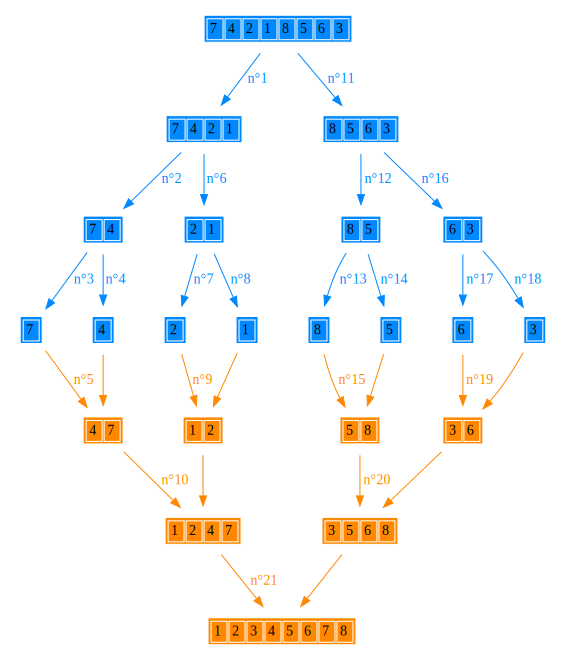

In [7]:
from graphviz import Digraph

# TODO : Il y a certainement moyen de générer l'arbre sans avoir à inclure le graphviz dans les fonctions de fusion et de tri
# générer un graphe/arbre et le parcourir ?

def graph_fusion(T1, T2, id1, id2, counter):
    """
    T1 : une liste triée
    T2 : une liste triée
    """
    #print("=========> graph_fusion(%s, %s, %s, %s)"%(T1, T2, id1, id2))
    counter+=1
    result = []
    color = '#FF8800'
    i, j = 0, 0
    while i<len(T1) and j <len(T2):
        if T1[i] <= T2[j]:
            result.append(T1[i])
            i+=1
        else:
            result.append(T2[j])
            j+=1
    if T1:
        result.extend(T2[j:])
    if T2:
        result.extend(T1[i:])
    id12=id1+id2
    label="<<TABLE bgcolor='%s'><TR>"%color+''.join(['<TD>%s</TD>'%i for i in result])+"</TR></TABLE>>"
    dot.node(id12, label=label)
    dot.edge(id1, id12, label="n°%s"%counter, color = color, fontcolor = color)
    dot.edge(id2, id12, color = color, fontcolor = color)
    #print("=========> %s"%result)
    return result, id12, counter

def graph_tri_fusion(tableau, dot, id_pere='s', side='', counter=0):
    """
    tableau : a list of elements
    return the sorted table
    """
    color = '#0088FF'
    #print("===> graph_tri_fusion(%s)"%tableau)
    if side=='gauche':
        current_id=id_pere+'0'
    elif side=='droite':
        current_id=id_pere+'1'
    else:
        current_id='s'

    label="<<TABLE bgcolor='%s'><TR>"%color+''.join(['<TD>%s</TD>'%i for i in tableau])+"</TR></TABLE>>"
    dot.node(current_id, label=label)
    if id_pere != current_id:
        #print("%s <=> %s"%(id_pere, idp))
        counter+=1
        dot.edge(id_pere, current_id, label="n°%s"%counter, color = color, fontcolor = color)
    if len(tableau)<=1:
        return tableau, current_id, counter
    gauche=tableau[:len(tableau)//2]
    droite=tableau[len(tableau)//2:]
    T1, id1, counter = graph_tri_fusion(gauche, dot, id_pere=current_id, side='gauche', counter=counter)
    T2, id2, counter = graph_tri_fusion(droite, dot, id_pere=current_id, side='droite', counter=counter)
    fus, current_id, counter = graph_fusion(T1, T2, id1, id2, counter)
    #print("===> %s - %s"%(fus, current_id))
    return fus, current_id, counter

dot = Digraph(comment='Tri fusion', format = 'png')
dot.attr('node', color='white')
graph_tri_fusion(TABLEAU, dot)
dot.render('graph') 
dot

# Comparaison d'efficacité avec le tri par insertion

In [4]:
def tri_insertion(tableau): 
    for i in range(1, len(tableau)): 
        k = tableau[i] 
        j = i-1
        while j >= 0 and k < tableau[j] : 
                tableau[j + 1] = tableau[j] 
                j -= 1
        tableau[j + 1] = k

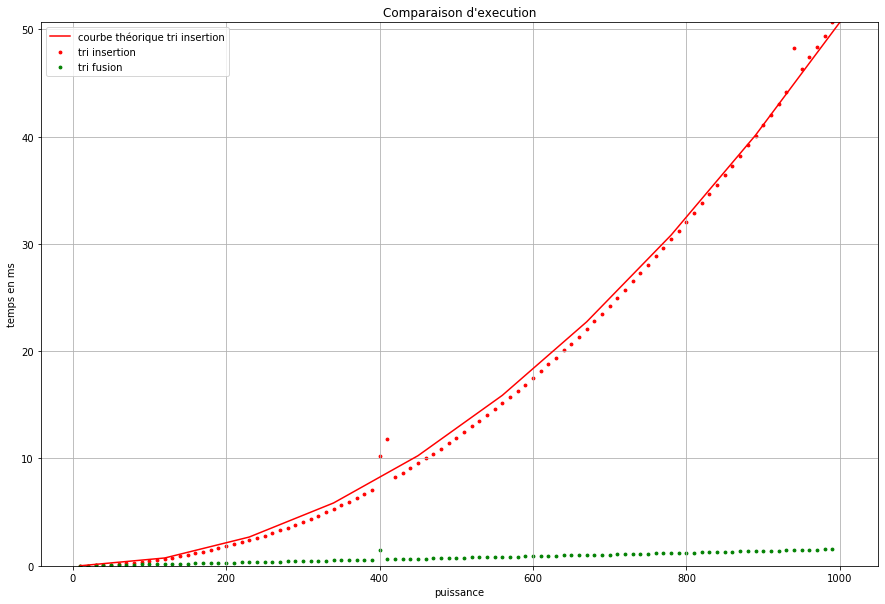

In [5]:
import timeit
import matplotlib.pyplot as plt
import numpy as np

# faisons une liste des puissance et du pas

listes=[]
mini = 10
maxi = 1000
for n in range(mini, maxi, 10):
    listes.append([j for j in range(n,0,-1) ])
resultsA=[]
resultsB=[]
# On teste sur ce nombre
number=60
for l in listes:
    # Cas de la puissance recursive basique
    starttime = timeit.default_timer()
    tri_insertion(l)
    diffA=timeit.default_timer() - starttime
    resultsA.append(diffA)
    # Cas de la puissance recursive diviser pour régner
    starttime = timeit.default_timer()
    tri_fusion(l)
    diffB=timeit.default_timer() - starttime
    resultsB.append(diffB)

# création du graphique de points
x2 = [len(l) for l in listes]
yA = [r*1000 for r in resultsA]
yB = [r*1000 for r in resultsB]

x = np.linspace(mini, maxi,10)
y2A = max(yA)*x**2/maxi**2

plt.figure(figsize=(15,10))
plt.ylim(top=1000*max(resultsA))
plt.scatter(x2,yA, c='red', s=8, label="tri insertion")
plt.scatter(x2,yB, c='green', s=8, label="tri fusion")
plt.plot(x, y2A, '-r', label='courbe théorique tri insertion')
plt.grid(which='both')
plt.title("Comparaison d'execution")
plt.xlabel('puissance')
plt.ylabel('temps en ms')
plt.legend(loc='upper left')
plt.show()